# Working Only On Rollnumber

## Static corrdinates

In [ ]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow
img = cv2.imread('/content/2.jpg', cv2.IMREAD_COLOR)
img_draw = img.copy()

columns = {
    1: [(1480, 639, 19), (1481, 695, 17), (1481, 753, 18), (1481, 811, 18), (1481, 869, 17),
        (1481, 927, 17), (1481, 985, 18), (1481, 1043, 18), (1484, 1099, 19), (1483, 1157, 19)],
    2: [(1532, 638, 17), (1533, 697, 19), (1532, 753, 18), (1532, 811, 18), (1532, 868, 17),
        (1531, 927, 17), (1533, 983, 19), (1529, 1045, 19), (1531, 1101, 17), (1531, 1160, 17)],
    3: [(1582, 638, 18), (1582, 695, 17), (1582, 753, 17), (1581, 811, 17), (1582, 868, 17),
        (1581, 927, 17), (1582, 985, 17), (1581, 1043, 18), (1583, 1100, 19), (1582, 1159, 17)],
    4: [(1631, 638, 17), (1631, 694, 18), (1631, 754, 18), (1631, 812, 18), (1631, 869, 18),
        (1631, 926, 18), (1631, 985, 17), (1631, 1043, 18), (1631, 1101, 18), (1630, 1157, 19)],
    5: [(1679, 638, 19), (1682, 694, 17), (1682, 753, 17), (1679, 811, 19), (1682, 871, 19),
        (1681, 927, 17), (1681, 985, 16), (1682, 1042, 17), (1682, 1101, 18), (1681, 1160, 17)],
    6: [(1732, 637, 17), (1731, 694, 17), (1731, 753, 18), (1731, 811, 18), (1731, 869, 17),
        (1731, 927, 17), (1731, 985, 17), (1730, 1043, 17), (1730, 1100, 19), (1731, 1159, 17)],
    7: [(1781, 637, 18), (1783, 697, 19), (1781, 753, 18), (1781, 811, 18), (1781, 868, 17),
        (1780, 927, 17), (1781, 985, 17), (1781, 1042, 18), (1780, 1101, 17), (1781, 1160, 17)],
    8: [(1832, 637, 17), (1831, 694, 16), (1831, 753, 17), (1833, 812, 19), (1829, 868, 19),
        (1831, 927, 18), (1829, 985, 19), (1833, 1045, 19), (1831, 1100, 18), (1833, 1157, 19)],
    9: [(1881, 637, 18), (1882, 695, 17), (1882, 753, 17), (1881, 811, 18), (1880, 867, 19),
        (1881, 926, 18), (1882, 985, 18), (1881, 1042, 17), (1882, 1101, 17), (1883, 1161, 19)],
    10: [(1933, 638, 19), (1930, 695, 18), (1930, 753, 17), (1930, 812, 17), (1930, 868, 17),
         (1931, 927, 17), (1931, 985, 17), (1930, 1043, 17), (1930, 1101, 18), (1930, 1157, 19)]
}

# Define 10 distinct colors (BGR format) for each column
colors = [
    (255, 0, 0),     # Blue
    (0, 255, 0),     # Green
    (0, 0, 255),     # Red
    (255, 255, 0), # Cyan
    (255, 0, 255), # Magenta
    (0, 255, 255), # Yellow
    (128, 0, 0),     # Dark Blue
    (0, 128, 0),     # Dark Green
    (0, 0, 128),     # Dark Red
    (128, 128, 0)    # Olive
]

# Draw circles for each column with its corresponding color and numbering
for col_num in sorted(columns.keys()):
    color = colors[col_num - 1]
    for idx, (x, y, r) in enumerate(columns[col_num], start=1):
        # Draw the circle with thickness=2
        cv2.circle(img_draw, (x, y), r, color, 2)
        # Put the numbering text (the index in that column)
        cv2.putText(img_draw, str(idx), (x - r, y - r), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
        # Optionally, print the coordinates in the console for reference
        print(f"Column {col_num} - Circle {idx}: (x={x}, y={y}, r={r})")

# Display the image with drawn circles and labels
cv2_imshow(img_draw)

In [4]:
# Correct circule - in 2,6
# Incorrect circule - in 3,4,5

## dynami corrdinates

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image
img = cv2.imread('/content/6.jpg', cv2.IMREAD_COLOR)
img_draw = img.copy()

# Predefined columns with coordinates and approximate radii
columns = {
    1: [(1480, 639, 19), (1481, 695, 17), (1481, 753, 18), (1481, 811, 18), (1481, 869, 17),
        (1481, 927, 17), (1481, 985, 18), (1481, 1043, 18), (1484, 1099, 19), (1483, 1157, 19)],
    2: [(1532, 638, 17), (1533, 697, 19), (1532, 753, 18), (1532, 811, 18), (1532, 868, 17),
        (1531, 927, 17), (1533, 983, 19), (1529, 1045, 19), (1531, 1101, 17), (1531, 1160, 17)],
    3: [(1582, 638, 18), (1582, 695, 17), (1582, 753, 17), (1581, 811, 17), (1582, 868, 17),
        (1581, 927, 17), (1582, 985, 17), (1581, 1043, 18), (1583, 1100, 19), (1582, 1159, 17)],
    4: [(1631, 638, 17), (1631, 694, 18), (1631, 754, 18), (1631, 812, 18), (1631, 869, 18),
        (1631, 926, 18), (1631, 985, 17), (1631, 1043, 18), (1631, 1101, 18), (1630, 1157, 19)],
    5: [(1679, 638, 19), (1682, 694, 17), (1682, 753, 17), (1679, 811, 19), (1682, 871, 19),
        (1681, 927, 17), (1681, 985, 16), (1682, 1042, 17), (1682, 1101, 18), (1681, 1160, 17)],
    6: [(1732, 637, 17), (1731, 694, 17), (1731, 753, 18), (1731, 811, 18), (1731, 869, 17),
        (1731, 927, 17), (1731, 985, 17), (1730, 1043, 17), (1730, 1100, 19), (1731, 1159, 17)],
    7: [(1781, 637, 18), (1783, 697, 19), (1781, 753, 18), (1781, 811, 18), (1781, 868, 17),
        (1780, 927, 17), (1781, 985, 17), (1781, 1042, 18), (1780, 1101, 17), (1781, 1160, 17)],
    8: [(1832, 637, 17), (1831, 694, 16), (1831, 753, 17), (1833, 812, 19), (1829, 868, 19),
        (1831, 927, 18), (1829, 985, 19), (1833, 1045, 19), (1831, 1100, 18), (1833, 1157, 19)],
    9: [(1881, 637, 18), (1882, 695, 17), (1882, 753, 17), (1881, 811, 18), (1880, 867, 19),
        (1881, 926, 18), (1882, 985, 18), (1881, 1042, 17), (1882, 1101, 17), (1883, 1161, 19)],
    10: [(1933, 638, 19), (1930, 695, 18), (1930, 753, 17), (1930, 812, 17), (1930, 868, 17),
         (1931, 927, 17), (1931, 985, 17), (1930, 1043, 17), (1930, 1101, 18), (1930, 1157, 19)]
}

# Define 10 distinct colors (BGR format) for each column
colors = [
    (255, 0, 0),     # Blue
    (0, 255, 0),     # Green
    (0, 0, 255),     # Red
    (255, 255, 0),   # Cyan
    (255, 0, 255),   # Magenta
    (0, 255, 255),   # Yellow
    (128, 0, 0),     # Dark Blue
    (0, 128, 0),     # Dark Green
    (0, 0, 128),     # Dark Red
    (128, 128, 0)    # Olive
]

# Function to adjust circle coordinates using HoughCircles
def adjust_circle_coordinate(img, x, y, expected_r, roi_margin=20):
    """
    Extract a region of interest (ROI) around the expected coordinate, and use HoughCircles
    to find the best matching circle. Returns the adjusted (x, y, r).
    """
    height, width = img.shape[:2]
    # Define ROI boundaries, ensuring we don't go out of image bounds
    x1 = max(x - roi_margin, 0)
    y1 = max(y - roi_margin, 0)
    x2 = min(x + roi_margin, width)
    y2 = min(y + roi_margin, height)

    roi = img[y1:y2, x1:x2]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    # Optionally blur to reduce noise
    gray_roi = cv2.medianBlur(gray_roi, 5)

    # Adjust parameters as needed
    circles = cv2.HoughCircles(gray_roi, cv2.HOUGH_GRADIENT, dp=1, minDist=roi_margin,
                               param1=50, param2=15,
                               minRadius=max(expected_r - 5, 0),
                               maxRadius=expected_r + 5)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        # Find the circle closest to the center of the ROI
        best_circle = None
        best_dist = float('inf')
        for circle in circles[0, :]:
            cx, cy, cr = circle
            # Calculate distance from the center of ROI (which is our expected location in ROI coordinates)
            roi_center = (roi.shape[1] // 2, roi.shape[0] // 2)
            dist = np.sqrt((cx - roi_center[0])**2 + (cy - roi_center[1])**2)
            if dist < best_dist:
                best_dist = dist
                best_circle = (cx, cy, cr)
        if best_circle is not None:
            # Adjust circle coordinates to the coordinate space of the original image
            adjusted_x = x1 + best_circle[0]
            adjusted_y = y1 + best_circle[1]
            adjusted_r = best_circle[2]
            return adjusted_x, adjusted_y, adjusted_r
    # Fallback to original values if no circle is detected
    return x, y, expected_r

# Process and draw circles for each column
for col_num in sorted(columns.keys()):
    color = colors[col_num - 1]
    for idx, (x, y, r) in enumerate(columns[col_num], start=1):
        # Adjust the coordinate using HoughCircles in a local ROI
        adjusted_x, adjusted_y, adjusted_r = adjust_circle_coordinate(img, x, y, r)

        # Draw the adjusted circle with thickness=2
        cv2.circle(img_draw, (adjusted_x, adjusted_y), adjusted_r, color, 2)
        # Put the numbering text (the index in that column)
        cv2.putText(img_draw, str(idx), (adjusted_x - adjusted_r, adjusted_y - adjusted_r),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
        # Optionally print the adjusted coordinates for reference
        print(f"Column {col_num} - Circle {idx}: (x={adjusted_x}, y={adjusted_y}, r={adjusted_r})")

# Display the image with drawn circles and labels
cv2_imshow(img_draw)


## Finding the filled circle in the column and rturning the count of it

<ipython-input-36-44d0cb8d25fc>:71: RuntimeWarning: overflow encountered in scalar subtract
  dist = np.sqrt((cx - roi_center[0])**2 + (cy - roi_center[1])**2)


Filled counts for each column: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Filled counts for each column: {1: [10], 2: [9], 3: [8], 4: [7], 5: [6], 6: [5], 7: [4], 8: [3], 9: [2], 10: [1]}


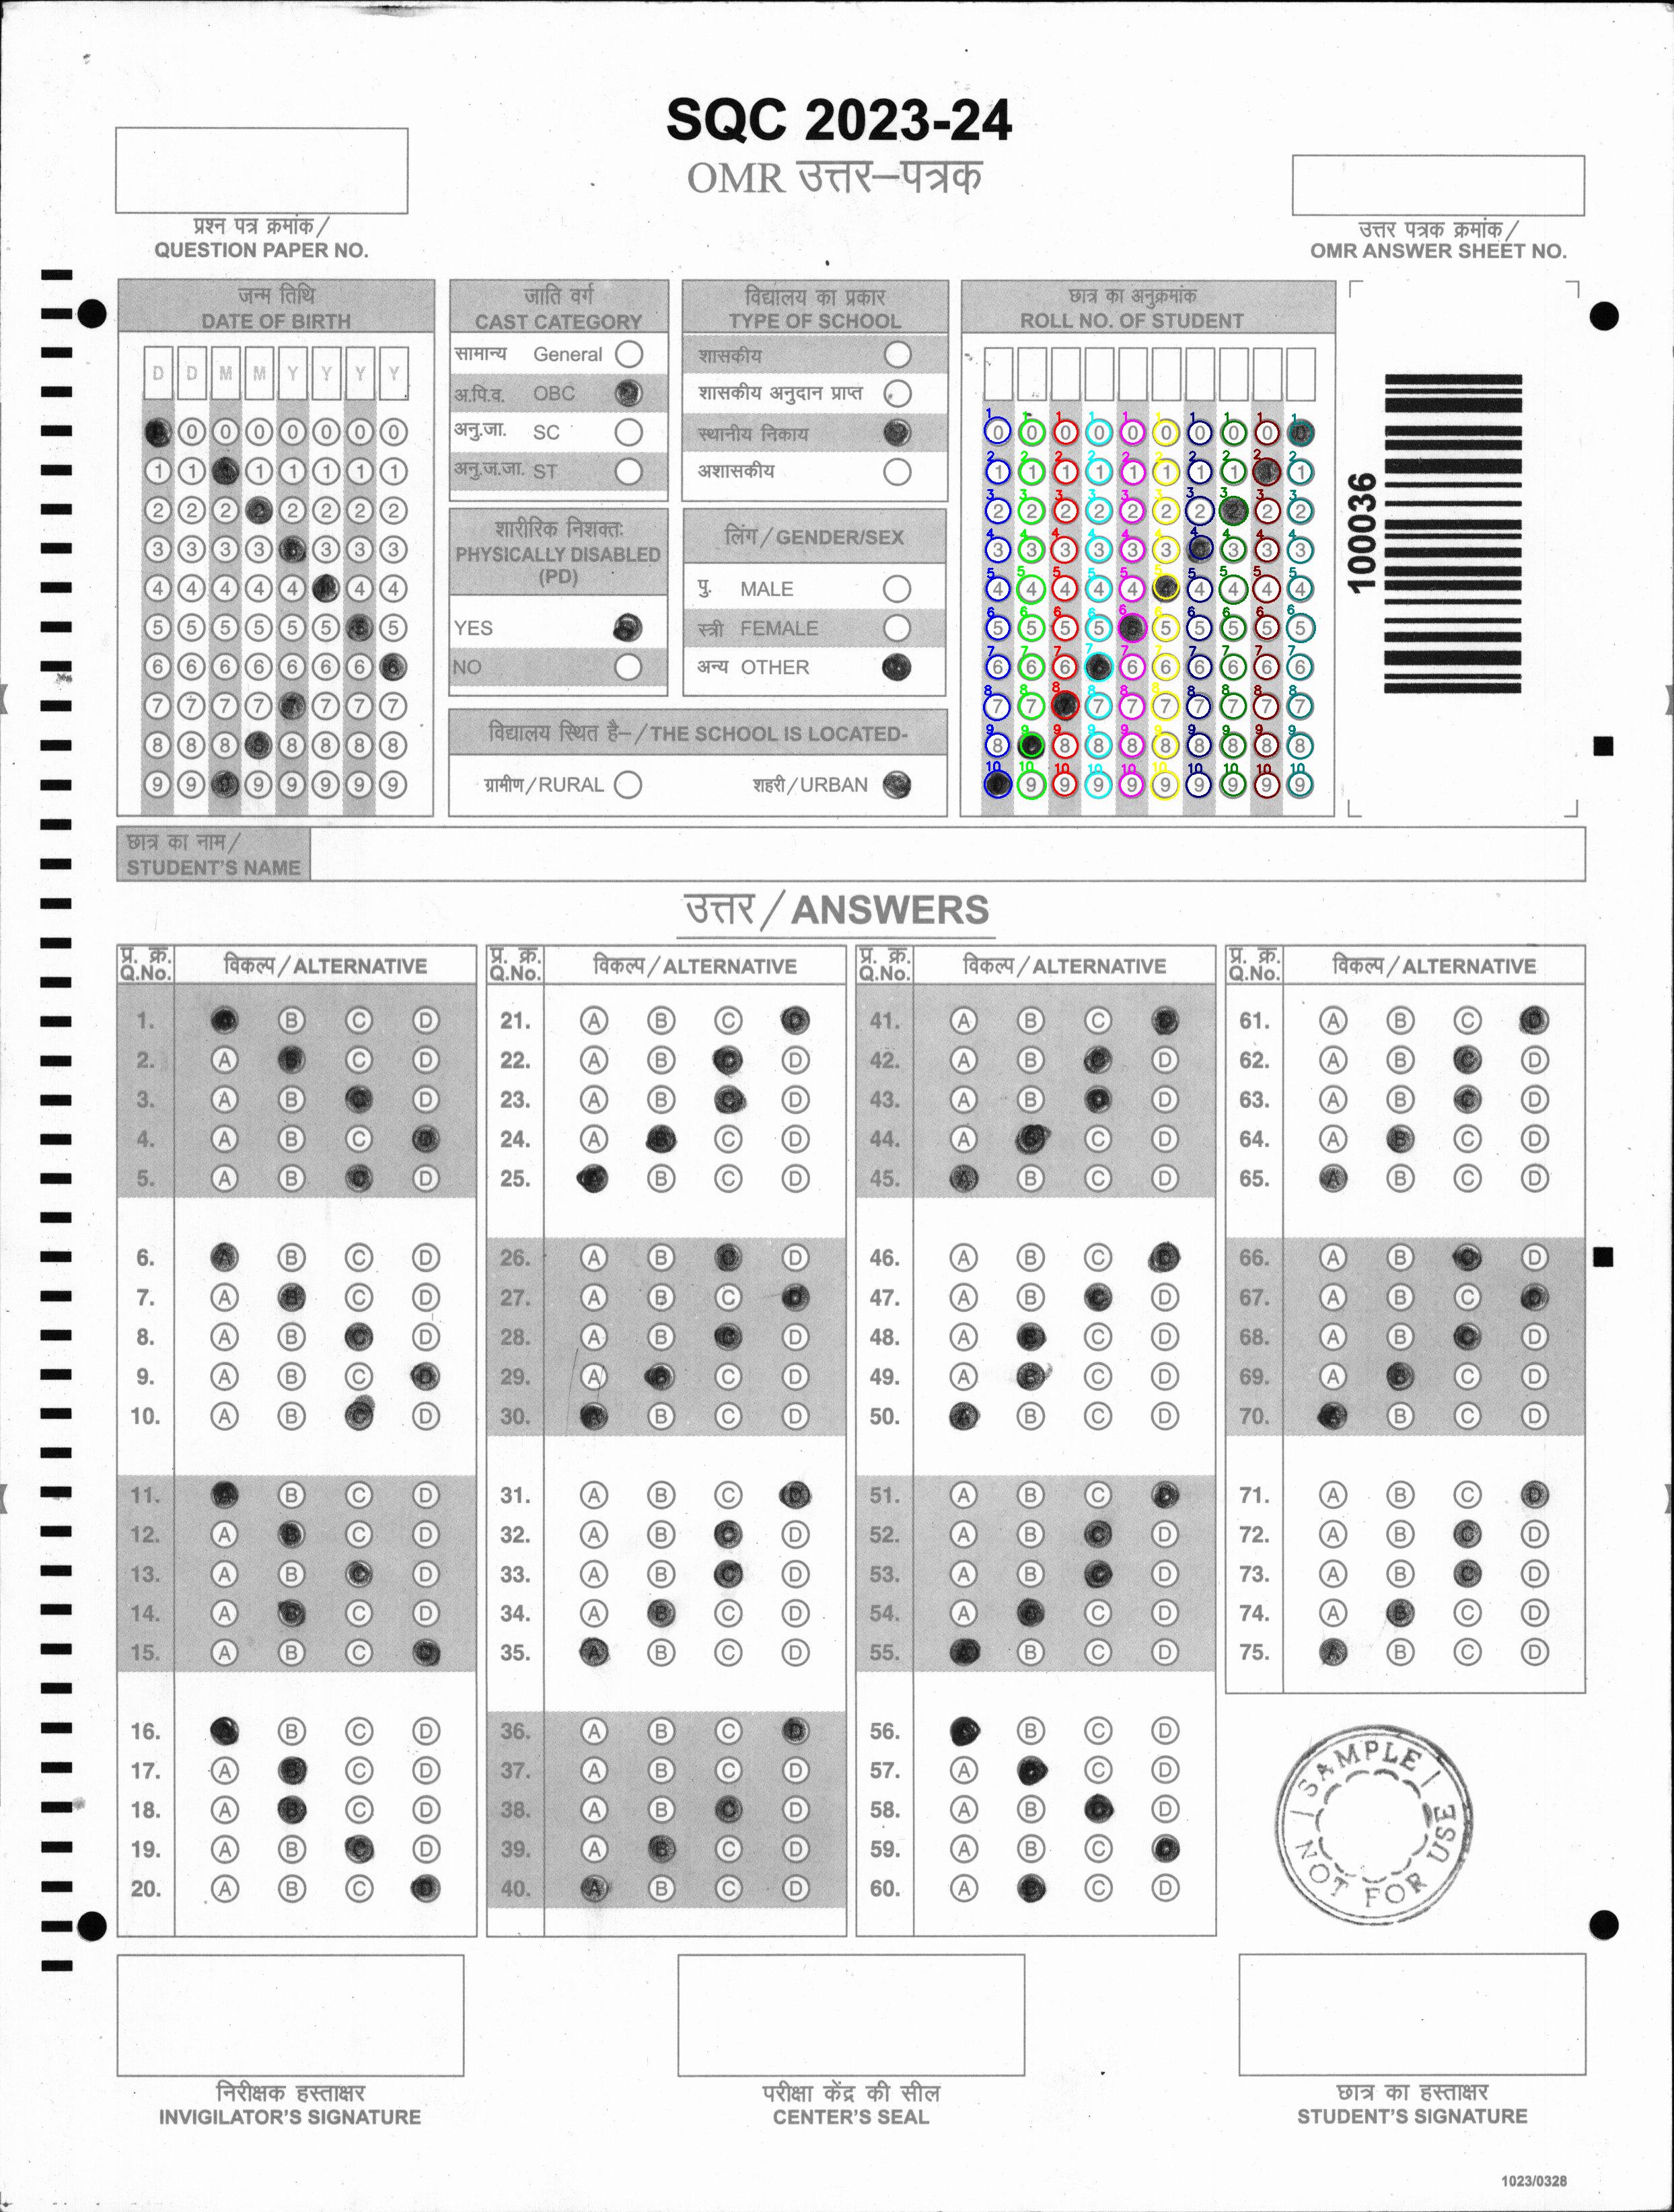

In [36]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image
img = cv2.imread('/content/1.jpg', cv2.IMREAD_COLOR)
img_draw = img.copy()

# Predefined columns with coordinates and approximate radii
columns = {
    1: [(1480, 639, 19), (1481, 695, 17), (1481, 753, 18), (1481, 811, 18), (1481, 869, 17),
        (1481, 927, 17), (1481, 985, 18), (1481, 1043, 18), (1484, 1099, 19), (1483, 1157, 19)],
    2: [(1532, 638, 17), (1533, 697, 19), (1532, 753, 18), (1532, 811, 18), (1532, 868, 17),
        (1531, 927, 17), (1533, 983, 19), (1529, 1045, 19), (1531, 1101, 17), (1531, 1160, 17)],
    3: [(1582, 638, 18), (1582, 695, 17), (1582, 753, 17), (1581, 811, 17), (1582, 868, 17),
        (1581, 927, 17), (1582, 985, 17), (1581, 1043, 18), (1583, 1100, 19), (1582, 1159, 17)],
    4: [(1631, 638, 17), (1631, 694, 18), (1631, 754, 18), (1631, 812, 18), (1631, 869, 18),
        (1631, 926, 18), (1631, 985, 17), (1631, 1043, 18), (1631, 1101, 18), (1630, 1157, 19)],
    5: [(1679, 638, 19), (1682, 694, 17), (1682, 753, 17), (1679, 811, 19), (1682, 871, 19),
        (1681, 927, 17), (1681, 985, 16), (1682, 1042, 17), (1682, 1101, 18), (1681, 1160, 17)],
    6: [(1732, 637, 17), (1731, 694, 17), (1731, 753, 18), (1731, 811, 18), (1731, 869, 17),
        (1731, 927, 17), (1731, 985, 17), (1730, 1043, 17), (1730, 1100, 19), (1731, 1159, 17)],
    7: [(1781, 637, 18), (1783, 697, 19), (1781, 753, 18), (1781, 811, 18), (1781, 868, 17),
        (1780, 927, 17), (1781, 985, 17), (1781, 1042, 18), (1780, 1101, 17), (1781, 1160, 17)],
    8: [(1832, 637, 17), (1831, 694, 16), (1831, 753, 17), (1833, 812, 19), (1829, 868, 19),
        (1831, 927, 18), (1829, 985, 19), (1833, 1045, 19), (1831, 1100, 18), (1833, 1157, 19)],
    9: [(1881, 637, 18), (1882, 695, 17), (1882, 753, 17), (1881, 811, 18), (1880, 867, 19),
        (1881, 926, 18), (1882, 985, 18), (1881, 1042, 17), (1882, 1101, 17), (1883, 1161, 19)],
    10: [(1933, 638, 19), (1930, 695, 18), (1930, 753, 17), (1930, 812, 17), (1930, 868, 17),
         (1931, 927, 17), (1931, 985, 17), (1930, 1043, 17), (1930, 1101, 18), (1930, 1157, 19)]
}

# Define colors for visualization (optional)
colors = [
    (255, 0, 0),     # Blue
    (0, 255, 0),     # Green
    (0, 0, 255),     # Red
    (255, 255, 0),   # Cyan
    (255, 0, 255),   # Magenta
    (0, 255, 255),   # Yellow
    (128, 0, 0),     # Dark Blue
    (0, 128, 0),     # Dark Green
    (0, 0, 128),     # Dark Red
    (128, 128, 0)    # Olive
]

# Function to adjust circle coordinates using HoughCircles (as before)
def adjust_circle_coordinate(img, x, y, expected_r, roi_margin=20):
    height, width = img.shape[:2]
    x1 = max(x - roi_margin, 0)
    y1 = max(y - roi_margin, 0)
    x2 = min(x + roi_margin, width)
    y2 = min(y + roi_margin, height)

    roi = img[y1:y2, x1:x2]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray_roi = cv2.medianBlur(gray_roi, 5)

    circles = cv2.HoughCircles(gray_roi, cv2.HOUGH_GRADIENT, dp=1, minDist=roi_margin,
                               param1=50, param2=15,
                               minRadius=max(expected_r - 5, 0),
                               maxRadius=expected_r + 5)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        best_circle = None
        best_dist = float('inf')
        for circle in circles[0, :]:
            cx, cy, cr = circle
            roi_center = (gray_roi.shape[1] // 2, gray_roi.shape[0] // 2)
            dist = np.sqrt((cx - roi_center[0])**2 + (cy - roi_center[1])**2)
            if dist < best_dist:
                best_dist = dist
                best_circle = (cx, cy, cr)
        if best_circle is not None:
            adjusted_x = x1 + best_circle[0]
            adjusted_y = y1 + best_circle[1]
            adjusted_r = best_circle[2]
            return adjusted_x, adjusted_y, adjusted_r
    return x, y, expected_r

# First, adjust all the circle coordinates and store them per column.
adjusted_columns = {}
for col_num in sorted(columns.keys()):
    adjusted_circles = []
    for (x, y, r) in columns[col_num]:
        adjusted = adjust_circle_coordinate(img, x, y, r)
        adjusted_circles.append(adjusted)
        # (Optional) Draw the adjusted circle on the image for visualization
        cv2.circle(img_draw, (adjusted[0], adjusted[1]), adjusted[2], colors[col_num - 1], 2)
        cv2.putText(img_draw, str(adjusted_circles.index(adjusted) + 1),
                    (adjusted[0] - adjusted[2], adjusted[1] - adjusted[2]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[col_num - 1], 2)
    adjusted_columns[col_num] = adjusted_circles

# Now, convert the image to grayscale for analyzing fill level.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define a threshold for "filled" (i.e. dark/black) circles.
# You may need to adjust this threshold based on your images.
fill_threshold = 150  # Lower values mean darker

# Count filled circles for each column
filled_counts = {}
column_and_circule_corrdinate={}
for col_num, circles in adjusted_columns.items():
    count = 0
    i=0
    circle_numbers=[]
    for (x, y, r) in circles:
        # Create a mask for the circle region
        i=i+1
        mask = np.zeros_like(gray)
        cv2.circle(mask, (x, y), r, 255, thickness=-1)
        # Compute the average pixel intensity inside the circle
        mean_intensity = cv2.mean(gray, mask=mask)[0]
        # If the average is below our threshold, we consider it filled.
        if mean_intensity < fill_threshold:
            count += 1
            circle_numbers.append(i)
    column_and_circule_corrdinate[col_num]=circle_numbers
    filled_counts[col_num] = count

# Build a list with the count for each column in order (columns 1 to 10)
filled_list = [filled_counts.get(col, 0) for col in range(1, 11)]
print("Filled counts for each column:", filled_list)
print("Filled counts for each column:", column_and_circule_corrdinate)

# (Optional) Display the image with drawn circles
cv2_imshow(img_draw)

# Complete omr sheet generation program

In [27]:
import numpy as np
import cv2

In [28]:
omr_map = {
    "dob": [],
    "cast": [],
    "schooltype": [],
    "pd": [],
    "gender": [],
    "schoollocation": [],
    "rollnumber":[],
    "answers": []
}

## real corrdinates for the uspc sheet

In [29]:
dobrealcorrdinates = [[(np.int64(235), np.int64(641), np.int64(21)),
(np.int64(235), np.int64(700), np.int64(18)),
(np.int64(235), np.int64(758), np.int64(18)),
(np.int64(235), np.int64(815), np.int64(18)),
(np.int64(235), np.int64(874), np.int64(21)),
(np.int64(235), np.int64(932), np.int64(21)),
(np.int64(235), np.int64(989), np.int64(21)),
(np.int64(233), np.int64(1048), np.int64(21)),
(np.int64(233), np.int64(1107), np.int64(18)),
(np.int64(233), np.int64(1166), np.int64(21))],
[(np.int64(285), np.int64(641), np.int64(17)),
(np.int64(285), np.int64(700), np.int64(17)),
(np.int64(285), np.int64(758), np.int64(22)),
(np.int64(285), np.int64(817), np.int64(21)),
(np.int64(285), np.int64(874), np.int64(21)),
(np.int64(284), np.int64(932), np.int64(18)),
(np.int64(284), np.int64(991), np.int64(22)),
(np.int64(284), np.int64(1048), np.int64(18)),
(np.int64(284), np.int64(1107), np.int64(22)),
(np.int64(284), np.int64(1166), np.int64(18))],
[(np.int64(335), np.int64(641), np.int64(21)),
(np.int64(334), np.int64(699), np.int64(21)),
(np.int64(334), np.int64(758), np.int64(21)),
(np.int64(334), np.int64(817), np.int64(21)),
(np.int64(334), np.int64(874), np.int64(21)),
(np.int64(334), np.int64(932), np.int64(21)),
(np.int64(334), np.int64(991), np.int64(18)),
(np.int64(334), np.int64(1049), np.int64(21)),
(np.int64(334), np.int64(1107), np.int64(18)),
(np.int64(333), np.int64(1166), np.int64(21))],
[(np.int64(385), np.int64(641), np.int64(22)),
(np.int64(385), np.int64(699), np.int64(21)),
(np.int64(385), np.int64(758), np.int64(21)),
(np.int64(385), np.int64(815), np.int64(17)),
(np.int64(383), np.int64(874), np.int64(21)),
(np.int64(385), np.int64(933), np.int64(17)),
(np.int64(385), np.int64(991), np.int64(22)),
(np.int64(385), np.int64(1049), np.int64(21)),
(np.int64(383), np.int64(1107), np.int64(22)),
(np.int64(385), np.int64(1166), np.int64(22))],
[(np.int64(435), np.int64(641), np.int64(21)),
(np.int64(435), np.int64(700), np.int64(21)),
(np.int64(434), np.int64(758), np.int64(21)),
(np.int64(435), np.int64(815), np.int64(21)),
(np.int64(434), np.int64(874), np.int64(17)),
(np.int64(434), np.int64(933), np.int64(21)),
(np.int64(434), np.int64(991), np.int64(18)),
(np.int64(435), np.int64(1051), np.int64(20)),
(np.int64(434), np.int64(1107), np.int64(17)),
(np.int64(431), np.int64(1167), np.int64(20))],
[(np.int64(485), np.int64(641), np.int64(21)),
(np.int64(484), np.int64(700), np.int64(22)),
(np.int64(484), np.int64(759), np.int64(21)),
(np.int64(484), np.int64(817), np.int64(17)),
(np.int64(482), np.int64(877), np.int64(17)),
(np.int64(484), np.int64(933), np.int64(22)),
(np.int64(484), np.int64(991), np.int64(21)),
(np.int64(484), np.int64(1049), np.int64(17)),
(np.int64(484), np.int64(1107), np.int64(17)),
(np.int64(483), np.int64(1166), np.int64(17))],
[(np.int64(535), np.int64(641), np.int64(21)),
(np.int64(535), np.int64(700), np.int64(18)),
(np.int64(535), np.int64(758), np.int64(18)),
(np.int64(535), np.int64(817), np.int64(22)),
(np.int64(533), np.int64(874), np.int64(17)),
(np.int64(533), np.int64(933), np.int64(21)),
(np.int64(535), np.int64(991), np.int64(21)),
(np.int64(533), np.int64(1049), np.int64(17)),
(np.int64(533), np.int64(1108), np.int64(17)),
(np.int64(533), np.int64(1166), np.int64(21))],
[(np.int64(585), np.int64(641), np.int64(22)),
(np.int64(585), np.int64(700), np.int64(17)),
(np.int64(585), np.int64(759), np.int64(18)),
(np.int64(585), np.int64(817), np.int64(17)),
(np.int64(584), np.int64(874), np.int64(22)),
(np.int64(584), np.int64(933), np.int64(17)),
(np.int64(584), np.int64(991), np.int64(21)),
(np.int64(584), np.int64(1049), np.int64(17)),
(np.int64(584), np.int64(1107), np.int64(21)),
(np.int64(584), np.int64(1166), np.int64(17))]]

In [30]:
castrealcorrdinates = [(np.int64(934), np.int64(526), np.int64(17)),
(np.int64(931), np.int64(583), np.int64(17)),
(np.int64(934), np.int64(641), np.int64(18)),
(np.int64(934), np.int64(700), np.int64(18))]

In [31]:
schooltyperealcorrdinates = [(np.int64(1334), np.int64(526), np.int64(21)),
(np.int64(1334), np.int64(584), np.int64(17)),
(np.int64(1329), np.int64(639), np.int64(20)),
(np.int64(1333), np.int64(701), np.int64(17))]

In [32]:
pdrealcorrdinates= [(np.int64(934), np.int64(933), np.int64(21)),
(np.int64(933), np.int64(991), np.int64(21))]

In [33]:
genderrealcorrdinates=  [(np.int64(1333), np.int64(875), np.int64(21)),
(np.int64(1333), np.int64(933), np.int64(22)),
(np.int64(1333), np.int64(992), np.int64(22))]

In [34]:
schoollocationrealcorrdinates = [(np.int64(933), np.int64(1166), np.int64(18)),
(np.int64(1333), np.int64(1166), np.int64(21))]


In [35]:
answerrealcorrdinates= [[(np.int64(333), np.int64(1516), np.int64(22)),
(np.int64(434), np.int64(1516), np.int64(21)),
(np.int64(533), np.int64(1516), np.int64(18)),
(np.int64(633), np.int64(1516), np.int64(21))],
[(np.int64(334), np.int64(1574), np.int64(22)),
(np.int64(433), np.int64(1574), np.int64(20)),
(np.int64(533), np.int64(1575), np.int64(17)),
(np.int64(633), np.int64(1575), np.int64(17))],
[(np.int64(333), np.int64(1634), np.int64(17)),
(np.int64(433), np.int64(1634), np.int64(17)),
(np.int64(535), np.int64(1636), np.int64(19)),
(np.int64(633), np.int64(1633), np.int64(21))],
[(np.int64(333), np.int64(1691), np.int64(17)),
(np.int64(433), np.int64(1693), np.int64(21)),
(np.int64(533), np.int64(1693), np.int64(22)),
(np.int64(633), np.int64(1693), np.int64(21))],
[(np.int64(334), np.int64(1751), np.int64(17)),
(np.int64(433), np.int64(1751), np.int64(21)),
(np.int64(533), np.int64(1751), np.int64(21)),
(np.int64(633), np.int64(1751), np.int64(21))],
[(np.int64(334), np.int64(1869), np.int64(21)),
(np.int64(433), np.int64(1869), np.int64(17)),
(np.int64(533), np.int64(1869), np.int64(18)),
(np.int64(633), np.int64(1869), np.int64(17))],
[(np.int64(333), np.int64(1928), np.int64(22)),
(np.int64(434), np.int64(1928), np.int64(22)),
(np.int64(533), np.int64(1928), np.int64(17)),
(np.int64(633), np.int64(1928), np.int64(17))],
[(np.int64(333), np.int64(1987), np.int64(18)),
(np.int64(433), np.int64(1987), np.int64(18)),
(np.int64(533), np.int64(1987), np.int64(22)),
(np.int64(633), np.int64(1987), np.int64(17))],
[(np.int64(333), np.int64(2045), np.int64(18)),
(np.int64(433), np.int64(2045), np.int64(18)),
(np.int64(533), np.int64(2045), np.int64(22)),
(np.int64(633), np.int64(2044), np.int64(22))],
[(np.int64(333), np.int64(2104), np.int64(18)),
(np.int64(433), np.int64(2104), np.int64(18)),
(np.int64(533), np.int64(2104), np.int64(21)),
(np.int64(633), np.int64(2105), np.int64(21))],
[(np.int64(334), np.int64(2221), np.int64(22)),
(np.int64(433), np.int64(2222), np.int64(22)),
(np.int64(533), np.int64(2221), np.int64(21)),
(np.int64(633), np.int64(2222), np.int64(18))],
[(np.int64(333), np.int64(2281), np.int64(21)),
(np.int64(434), np.int64(2281), np.int64(21)),
(np.int64(533), np.int64(2281), np.int64(22)),
(np.int64(632), np.int64(2281), np.int64(18))],
[(np.int64(333), np.int64(2339), np.int64(17)),
(np.int64(433), np.int64(2339), np.int64(18)),
(np.int64(533), np.int64(2339), np.int64(22)),
(np.int64(632), np.int64(2339), np.int64(17))],
[(np.int64(333), np.int64(2397), np.int64(17)),
(np.int64(434), np.int64(2398), np.int64(21)),
(np.int64(533), np.int64(2397), np.int64(22)),
(np.int64(633), np.int64(2397), np.int64(21))],
[(np.int64(333), np.int64(2456), np.int64(22)),
(np.int64(433), np.int64(2456), np.int64(21)),
(np.int64(533), np.int64(2456), np.int64(22)),
(np.int64(633), np.int64(2456), np.int64(22))],
[(np.int64(333), np.int64(2572), np.int64(21)),
(np.int64(434), np.int64(2572), np.int64(21)),
(np.int64(533), np.int64(2573), np.int64(18)),
(np.int64(633), np.int64(2573), np.int64(21))],
[(np.int64(333), np.int64(2631), np.int64(17)),
(np.int64(434), np.int64(2631), np.int64(22)),
(np.int64(533), np.int64(2631), np.int64(22)),
(np.int64(633), np.int64(2631), np.int64(17))],
[(np.int64(334), np.int64(2690), np.int64(22)),
(np.int64(433), np.int64(2690), np.int64(21)),
(np.int64(533), np.int64(2690), np.int64(22)),
(np.int64(633), np.int64(2690), np.int64(17))],
[(np.int64(334), np.int64(2749), np.int64(17)),
(np.int64(434), np.int64(2749), np.int64(17)),
(np.int64(532), np.int64(2745), np.int64(20)),
(np.int64(634), np.int64(2747), np.int64(21))],
[(np.int64(334), np.int64(2807), np.int64(17)),
(np.int64(434), np.int64(2807), np.int64(18)),
(np.int64(533), np.int64(2806), np.int64(21)),
(np.int64(634), np.int64(2806), np.int64(21))],
[(np.int64(883), np.int64(1516), np.int64(17)),
(np.int64(983), np.int64(1516), np.int64(17)),
(np.int64(1082), np.int64(1516), np.int64(18)),
(np.int64(1183), np.int64(1516), np.int64(22))],
[(np.int64(883), np.int64(1575), np.int64(17)),
(np.int64(982), np.int64(1575), np.int64(18)),
(np.int64(1083), np.int64(1575), np.int64(21)),
(np.int64(1183), np.int64(1575), np.int64(18))],
[(np.int64(883), np.int64(1634), np.int64(17)),
(np.int64(982), np.int64(1634), np.int64(18)),
(np.int64(1082), np.int64(1631), np.int64(20)),
(np.int64(1183), np.int64(1634), np.int64(22))],
[(np.int64(883), np.int64(1693), np.int64(17)),
(np.int64(983), np.int64(1693), np.int64(22)),
(np.int64(1082), np.int64(1693), np.int64(17)),
(np.int64(1183), np.int64(1693), np.int64(22))],
[(np.int64(881), np.int64(1751), np.int64(22)),
(np.int64(983), np.int64(1751), np.int64(17)),
(np.int64(1083), np.int64(1751), np.int64(18)),
(np.int64(1181), np.int64(1751), np.int64(17))],
[(np.int64(883), np.int64(1869), np.int64(18)),
(np.int64(982), np.int64(1869), np.int64(21)),
(np.int64(1082), np.int64(1868), np.int64(21)),
(np.int64(1181), np.int64(1868), np.int64(21))],
[(np.int64(883), np.int64(1928), np.int64(18)),
(np.int64(982), np.int64(1928), np.int64(18)),
(np.int64(1082), np.int64(1928), np.int64(18)),
(np.int64(1183), np.int64(1928), np.int64(21))],
[(np.int64(883), np.int64(1987), np.int64(18)),
(np.int64(982), np.int64(1987), np.int64(18)),
(np.int64(1082), np.int64(1987), np.int64(21)),
(np.int64(1181), np.int64(1987), np.int64(17))],
[(np.int64(883), np.int64(2045), np.int64(21)),
(np.int64(982), np.int64(2045), np.int64(21)),
(np.int64(1082), np.int64(2045), np.int64(21)),
(np.int64(1183), np.int64(2045), np.int64(18))],
[(np.int64(880), np.int64(2103), np.int64(18)),
(np.int64(982), np.int64(2104), np.int64(18)),
(np.int64(1083), np.int64(2104), np.int64(21)),
(np.int64(1183), np.int64(2105), np.int64(21))],
[(np.int64(883), np.int64(2222), np.int64(21)),
(np.int64(982), np.int64(2222), np.int64(18)),
(np.int64(1082), np.int64(2222), np.int64(17)),
(np.int64(1183), np.int64(2222), np.int64(21))],
[(np.int64(883), np.int64(2281), np.int64(22)),
(np.int64(982), np.int64(2281), np.int64(18)),
(np.int64(1083), np.int64(2281), np.int64(21)),
(np.int64(1183), np.int64(2281), np.int64(22))],
[(np.int64(883), np.int64(2339), np.int64(21)),
(np.int64(982), np.int64(2339), np.int64(18)),
(np.int64(1083), np.int64(2339), np.int64(21)),
(np.int64(1183), np.int64(2339), np.int64(22))],
[(np.int64(883), np.int64(2397), np.int64(22)),
(np.int64(983), np.int64(2397), np.int64(17)),
(np.int64(1082), np.int64(2397), np.int64(18)),
(np.int64(1183), np.int64(2397), np.int64(21))],
[(np.int64(883), np.int64(2455), np.int64(22)),
(np.int64(982), np.int64(2456), np.int64(17)),
(np.int64(1082), np.int64(2456), np.int64(17)),
(np.int64(1183), np.int64(2456), np.int64(22))],
[(np.int64(883), np.int64(2572), np.int64(21)),
(np.int64(983), np.int64(2572), np.int64(21)),
(np.int64(1083), np.int64(2573), np.int64(21)),
(np.int64(1183), np.int64(2572), np.int64(22))],
[(np.int64(883), np.int64(2631), np.int64(18)),
(np.int64(983), np.int64(2631), np.int64(21)),
(np.int64(1083), np.int64(2631), np.int64(21)),
(np.int64(1183), np.int64(2631), np.int64(17))],
[(np.int64(885), np.int64(2691), np.int64(20)),
(np.int64(983), np.int64(2690), np.int64(21)),
(np.int64(1083), np.int64(2689), np.int64(22)),
(np.int64(1183), np.int64(2689), np.int64(17))],
[(np.int64(884), np.int64(2747), np.int64(21)),
(np.int64(983), np.int64(2747), np.int64(21)),
(np.int64(1084), np.int64(2749), np.int64(22)),
(np.int64(1183), np.int64(2749), np.int64(21))],
[(np.int64(883), np.int64(2807), np.int64(21)),
(np.int64(983), np.int64(2807), np.int64(17)),
(np.int64(1083), np.int64(2806), np.int64(22)),
(np.int64(1183), np.int64(2806), np.int64(22))],
[(np.int64(1432), np.int64(1516), np.int64(17)),
(np.int64(1532), np.int64(1516), np.int64(18)),
(np.int64(1631), np.int64(1516), np.int64(22)),
(np.int64(1732), np.int64(1516), np.int64(21))],
[(np.int64(1432), np.int64(1575), np.int64(18)),
(np.int64(1532), np.int64(1575), np.int64(17)),
(np.int64(1630), np.int64(1571), np.int64(17)),
(np.int64(1731), np.int64(1575), np.int64(21))],
[(np.int64(1432), np.int64(1634), np.int64(18)),
(np.int64(1531), np.int64(1634), np.int64(17)),
(np.int64(1631), np.int64(1634), np.int64(21)),
(np.int64(1731), np.int64(1634), np.int64(21))],
[(np.int64(1432), np.int64(1693), np.int64(17)),
(np.int64(1532), np.int64(1694), np.int64(21)),
(np.int64(1631), np.int64(1693), np.int64(18)),
(np.int64(1731), np.int64(1693), np.int64(21))],
[(np.int64(1432), np.int64(1751), np.int64(22)),
(np.int64(1532), np.int64(1751), np.int64(18)),
(np.int64(1631), np.int64(1751), np.int64(21)),
(np.int64(1732), np.int64(1750), np.int64(21))],
[(np.int64(1432), np.int64(1869), np.int64(18)),
(np.int64(1532), np.int64(1869), np.int64(18)),
(np.int64(1631), np.int64(1868), np.int64(21)),
(np.int64(1733), np.int64(1871), np.int64(18))],
[(np.int64(1432), np.int64(1928), np.int64(18)),
(np.int64(1532), np.int64(1928), np.int64(17)),
(np.int64(1631), np.int64(1928), np.int64(22)),
(np.int64(1731), np.int64(1928), np.int64(22))],
[(np.int64(1432), np.int64(1987), np.int64(22)),
(np.int64(1532), np.int64(1987), np.int64(22)),
(np.int64(1631), np.int64(1987), np.int64(22)),
(np.int64(1731), np.int64(1987), np.int64(18))],
[(np.int64(1431), np.int64(2045), np.int64(21)),
(np.int64(1532), np.int64(2045), np.int64(21)),
(np.int64(1631), np.int64(2045), np.int64(18)),
(np.int64(1731), np.int64(2045), np.int64(22))],
[(np.int64(1430), np.int64(2103), np.int64(19)),
(np.int64(1532), np.int64(2104), np.int64(22)),
(np.int64(1631), np.int64(2104), np.int64(22)),
(np.int64(1731), np.int64(2104), np.int64(22))],
[(np.int64(1432), np.int64(2222), np.int64(22)),
(np.int64(1532), np.int64(2222), np.int64(18)),
(np.int64(1631), np.int64(2222), np.int64(18)),
(np.int64(1732), np.int64(2224), np.int64(19))],
[(np.int64(1431), np.int64(2281), np.int64(21)),
(np.int64(1532), np.int64(2279), np.int64(17)),
(np.int64(1631), np.int64(2279), np.int64(21)),
(np.int64(1731), np.int64(2279), np.int64(17))],
[(np.int64(1432), np.int64(2339), np.int64(21)),
(np.int64(1531), np.int64(2339), np.int64(17)),
(np.int64(1631), np.int64(2337), np.int64(20)),
(np.int64(1731), np.int64(2339), np.int64(18))],
[(np.int64(1432), np.int64(2397), np.int64(18)),
(np.int64(1532), np.int64(2397), np.int64(21)),
(np.int64(1631), np.int64(2397), np.int64(18)),
(np.int64(1731), np.int64(2397), np.int64(22))],
[(np.int64(1432), np.int64(2455), np.int64(21)),
(np.int64(1532), np.int64(2455), np.int64(22)),
(np.int64(1633), np.int64(2456), np.int64(22)),
(np.int64(1731), np.int64(2456), np.int64(21))],
[(np.int64(1432), np.int64(2572), np.int64(22)),
(np.int64(1532), np.int64(2572), np.int64(17)),
(np.int64(1633), np.int64(2571), np.int64(21)),
(np.int64(1732), np.int64(2572), np.int64(18))],
[(np.int64(1432), np.int64(2631), np.int64(22)),
(np.int64(1532), np.int64(2630), np.int64(21)),
(np.int64(1631), np.int64(2630), np.int64(21)),
(np.int64(1732), np.int64(2630), np.int64(18))],
[(np.int64(1432), np.int64(2689), np.int64(17)),
(np.int64(1532), np.int64(2689), np.int64(17)),
(np.int64(334), np.int64(817), np.int64(21)),
(np.int64(1732), np.int64(2689), np.int64(22))],
[(np.int64(1433), np.int64(2747), np.int64(17)),
(np.int64(1532), np.int64(2747), np.int64(18)),
(np.int64(1633), np.int64(2747), np.int64(18)),
(np.int64(1732), np.int64(2747), np.int64(22))],
[(np.int64(1433), np.int64(2806), np.int64(21)),
(np.int64(1533), np.int64(2806), np.int64(22)),
(np.int64(1633), np.int64(2806), np.int64(18)),
(np.int64(1732), np.int64(2805), np.int64(18))],
[(np.int64(1981), np.int64(1516), np.int64(17)),
(np.int64(2081), np.int64(1516), np.int64(17)),
(np.int64(2181), np.int64(1516), np.int64(17)),
(np.int64(2282), np.int64(1516), np.int64(17))],
[(np.int64(1981), np.int64(1575), np.int64(17)),
(np.int64(2081), np.int64(1575), np.int64(17)),
(np.int64(2181), np.int64(1575), np.int64(21)),
(np.int64(2281), np.int64(1575), np.int64(22))],
[(np.int64(1982), np.int64(1634), np.int64(22)),
(np.int64(2081), np.int64(1634), np.int64(17)),
(np.int64(2181), np.int64(1634), np.int64(21)),
(np.int64(2281), np.int64(1634), np.int64(17))],
[(np.int64(1981), np.int64(1693), np.int64(22)),
(np.int64(2081), np.int64(1693), np.int64(21)),
(np.int64(2181), np.int64(1691), np.int64(21)),
(np.int64(2281), np.int64(1693), np.int64(17))],
[(np.int64(1981), np.int64(1750), np.int64(21)),
(np.int64(2081), np.int64(1751), np.int64(21)),
(np.int64(2181), np.int64(1751), np.int64(17)),
(np.int64(2281), np.int64(1751), np.int64(17))],
[(np.int64(1982), np.int64(1869), np.int64(22)),
(np.int64(2081), np.int64(1868), np.int64(17)),
(np.int64(2180), np.int64(1869), np.int64(22)),
(np.int64(2281), np.int64(1869), np.int64(18))],
[(np.int64(1982), np.int64(1928), np.int64(17)),
(np.int64(2081), np.int64(1928), np.int64(22)),
(np.int64(2181), np.int64(1928), np.int64(17)),
(np.int64(2281), np.int64(1928), np.int64(21))],
[(np.int64(1981), np.int64(1987), np.int64(21)),
(np.int64(2081), np.int64(1987), np.int64(18)),
(np.int64(2181), np.int64(1987), np.int64(20)),
(np.int64(2281), np.int64(1987), np.int64(22))],
[(np.int64(1982), np.int64(2045), np.int64(21)),
(np.int64(2081), np.int64(2044), np.int64(21)),
(np.int64(2181), np.int64(2045), np.int64(18)),
(np.int64(2281), np.int64(2045), np.int64(18))],
[(np.int64(1981), np.int64(2105), np.int64(21)),
(np.int64(2081), np.int64(2104), np.int64(18)),
(np.int64(2181), np.int64(2104), np.int64(18)),
(np.int64(2281), np.int64(2104), np.int64(18))],
[(np.int64(1981), np.int64(2222), np.int64(18)),
(np.int64(2081), np.int64(2221), np.int64(21)),
(np.int64(2181), np.int64(2222), np.int64(22)),
(np.int64(2281), np.int64(2222), np.int64(22))],
[(np.int64(1981), np.int64(2279), np.int64(21)),
(np.int64(934), np.int64(933), np.int64(21)),
(np.int64(2180), np.int64(2277), np.int64(14)),
(np.int64(2281), np.int64(2279), np.int64(21))],
[(np.int64(1981), np.int64(2339), np.int64(21)),
(np.int64(2081), np.int64(2339), np.int64(18)),
(np.int64(2181), np.int64(2339), np.int64(21)),
(np.int64(2281), np.int64(2339), np.int64(21))],
[(np.int64(1982), np.int64(2397), np.int64(17)),
(np.int64(2081), np.int64(2397), np.int64(21)),
(np.int64(2181), np.int64(2397), np.int64(22)),
(np.int64(2281), np.int64(2397), np.int64(18))],
[(np.int64(1982), np.int64(2455), np.int64(21)),
(np.int64(2081), np.int64(2455), np.int64(22)),
(np.int64(2181), np.int64(2455), np.int64(17)),
(np.int64(2281), np.int64(2455), np.int64(17))]]

In [36]:
rollnumberrealcorrdinates = [[(np.int64(1480), np.int64(639), np.int64(19)),
(np.int64(1481), np.int64(695), np.int64(17)),
(np.int64(1481), np.int64(753), np.int64(18)),
(np.int64(1481), np.int64(811), np.int64(18)),
(np.int64(1481), np.int64(869), np.int64(17)),
(np.int64(1481), np.int64(927), np.int64(17)),
(np.int64(1481), np.int64(985), np.int64(18)),
(np.int64(1481), np.int64(1043), np.int64(18)),
(np.int64(1484), np.int64(1099), np.int64(19)),
(np.int64(1483), np.int64(1157), np.int64(19))],
[(np.int64(1532), np.int64(638), np.int64(17)),
(np.int64(1533), np.int64(697), np.int64(19)),
(np.int64(1532), np.int64(753), np.int64(18)),
(np.int64(1532), np.int64(811), np.int64(18)),
(np.int64(1532), np.int64(868), np.int64(17)),
(np.int64(1531), np.int64(927), np.int64(17)),
(np.int64(1533), np.int64(983), np.int64(19)),
(np.int64(1529), np.int64(1045), np.int64(19)),
(np.int64(1531), np.int64(1101), np.int64(17)),
(np.int64(1531), np.int64(1160), np.int64(17))],
[(np.int64(1582), np.int64(638), np.int64(18)),
(np.int64(1582), np.int64(695), np.int64(17)),
(np.int64(1582), np.int64(753), np.int64(17)),
(np.int64(1581), np.int64(811), np.int64(17)),
(np.int64(1582), np.int64(868), np.int64(17)),
(np.int64(1581), np.int64(927), np.int64(17)),
(np.int64(1582), np.int64(985), np.int64(17)),
(np.int64(1581), np.int64(1043), np.int64(18)),
(np.int64(1583), np.int64(1100), np.int64(19)),
(np.int64(1582), np.int64(1159), np.int64(17))],
[(np.int64(1631), np.int64(638), np.int64(17)),
(np.int64(1631), np.int64(694), np.int64(18)),
(np.int64(1631), np.int64(754), np.int64(18)),
(np.int64(1631), np.int64(812), np.int64(18)),
(np.int64(1631), np.int64(869), np.int64(18)),
(np.int64(1631), np.int64(926), np.int64(18)),
(np.int64(1631), np.int64(985), np.int64(17)),
(np.int64(1631), np.int64(1043), np.int64(18)),
(np.int64(1631), np.int64(1101), np.int64(18)),
(np.int64(1630), np.int64(1157), np.int64(19))],
[(np.int64(1679), np.int64(638), np.int64(19)),
(np.int64(1682), np.int64(694), np.int64(17)),
(np.int64(1682), np.int64(753), np.int64(17)),
(np.int64(1679), np.int64(811), np.int64(19)),
(np.int64(1682), np.int64(871), np.int64(19)),
(np.int64(1681), np.int64(927), np.int64(17)),
(np.int64(1681), np.int64(985), np.int64(16)),
(np.int64(1682), np.int64(1042), np.int64(17)),
(np.int64(1682), np.int64(1101), np.int64(18)),
(np.int64(1681), np.int64(1160), np.int64(17))],
[(np.int64(1732), np.int64(637), np.int64(17)),
(np.int64(1731), np.int64(694), np.int64(17)),
(np.int64(1731), np.int64(753), np.int64(18)),
(np.int64(1731), np.int64(811), np.int64(18)),
(np.int64(1731), np.int64(869), np.int64(17)),
(np.int64(1731), np.int64(927), np.int64(17)),
(np.int64(1731), np.int64(985), np.int64(17)),
(np.int64(1730), np.int64(1043), np.int64(17)),
(np.int64(1730), np.int64(1100), np.int64(19)),
(np.int64(1731), np.int64(1159), np.int64(17))],
[(np.int64(1781), np.int64(637), np.int64(18)),
(np.int64(1783), np.int64(697), np.int64(19)),
(np.int64(1781), np.int64(753), np.int64(18)),
(np.int64(1781), np.int64(811), np.int64(18)),
(np.int64(1781), np.int64(868), np.int64(17)),
(np.int64(1780), np.int64(927), np.int64(17)),
(np.int64(1781), np.int64(985), np.int64(17)),
(np.int64(1781), np.int64(1042), np.int64(18)),
(np.int64(1780), np.int64(1101), np.int64(17)),
(np.int64(1781), np.int64(1160), np.int64(17))],
[(np.int64(1832), np.int64(637), np.int64(17)),
(np.int64(1831), np.int64(694), np.int64(16)),
(np.int64(1831), np.int64(753), np.int64(17)),
(np.int64(1833), np.int64(812), np.int64(19)),
(np.int64(1829), np.int64(868), np.int64(19)),
(np.int64(1831), np.int64(927), np.int64(18)),
(np.int64(1829), np.int64(985), np.int64(19)),
(np.int64(1833), np.int64(1045), np.int64(19)),
(np.int64(1831), np.int64(1100), np.int64(18)),
(np.int64(1833), np.int64(1157), np.int64(19))],
[(np.int64(1881), np.int64(637), np.int64(18)),
(np.int64(1882), np.int64(695), np.int64(17)),
(np.int64(1882), np.int64(753), np.int64(17)),
(np.int64(1881), np.int64(811), np.int64(18)),
(np.int64(1880), np.int64(867), np.int64(19)),
(np.int64(1881), np.int64(926), np.int64(18)),
(np.int64(1882), np.int64(985), np.int64(18)),
(np.int64(1881), np.int64(1042), np.int64(17)),
(np.int64(1882), np.int64(1101), np.int64(17)),
(np.int64(1883), np.int64(1161), np.int64(19))],
[(np.int64(1933), np.int64(638), np.int64(19)),
(np.int64(1930), np.int64(695), np.int64(18)),
(np.int64(1930), np.int64(753), np.int64(17)),
(np.int64(1930), np.int64(812), np.int64(17)),
(np.int64(1930), np.int64(868), np.int64(17)),
(np.int64(1931), np.int64(927), np.int64(17)),
(np.int64(1931), np.int64(985), np.int64(17)),
(np.int64(1930), np.int64(1043), np.int64(17)),
(np.int64(1930), np.int64(1101), np.int64(18)),
(np.int64(1930), np.int64(1157), np.int64(19))]]

## Here i am testing does the adjust circle program working correctly or not

In [37]:
omr_map['answers']= answerrealcorrdinates
omr_map['cast']= castrealcorrdinates
omr_map['dob']=dobrealcorrdinates
omr_map['gender']=genderrealcorrdinates
omr_map['pd']=pdrealcorrdinates
omr_map['schoollocation']=schoollocationrealcorrdinates
omr_map['schooltype']=schooltyperealcorrdinates
omr_map['rollnumber']= rollnumberrealcorrdinates

In [38]:
def adjust_circle_coordinate(img, x, y, expected_r, roi_margin=20):
    height, width = img.shape[:2]
    x1 = max(x - roi_margin, 0)
    y1 = max(y - roi_margin, 0)
    x2 = min(x + roi_margin, width)
    y2 = min(y + roi_margin, height)

    roi = img[y1:y2, x1:x2]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray_roi = cv2.medianBlur(gray_roi, 5)

    circles = cv2.HoughCircles(gray_roi, cv2.HOUGH_GRADIENT, dp=1, minDist=roi_margin,
                               param1=50, param2=15,
                               minRadius=max(expected_r - 5, 0),
                               maxRadius=expected_r + 5)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        best_circle = None
        best_dist = float('inf')
        for circle in circles[0, :]:
            cx, cy, cr = circle
            roi_center = (gray_roi.shape[1] // 2, gray_roi.shape[0] // 2)
            dist = np.sqrt((cx - roi_center[0])**2 + (cy - roi_center[1])**2)
            if dist < best_dist:
                best_dist = dist
                best_circle = (cx, cy, cr)
        if best_circle is not None:
            adjusted_x = x1 + best_circle[0]
            adjusted_y = y1 + best_circle[1]
            adjusted_r = best_circle[2]
            return adjusted_x, adjusted_y, adjusted_r
    return x, y, expected_r

In [39]:
colors = [
    (255, 0, 0),     # Blue
    (0, 255, 0),     # Green
    (0, 0, 255),     # Red
    (255, 255, 0), # Cyan
    (255, 0, 255), # Magenta
    (0, 255, 255), # Yellow
    (128, 0, 0),     # Dark Blue
    (0, 128, 0),     # Dark Green
    (0, 0, 128),     # Dark Red
    (128, 128, 0)    # Olive
]

In [48]:
img = cv2.imread('./files/batch_1/1.jpg', cv2.IMREAD_COLOR)
img_draw = img.copy()

In [ ]:
# Checking the mapping
def draw_circles_on_image(image, circles):
    for idx, (x, y, r) in enumerate(circles, start=1):
        # Draw the circle (green circle)
        x,y,r=adjust_circle_coordinate(img, x, y, r)
        cv2.circle(image, (x, y), r, (0, 255, 0), 2)
        # Draw the center of the circle (red dot)
        cv2.circle(image, (x, y), 2, (0, 0, 255), 2)
        # Label the circle with its index (blue text)
        cv2.putText(image, str(idx), (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    cv2.imshow(image)

In [ ]:
# Testing the cast
draw_circles_on_image(img_draw,omr_map['cast'])

# Testing the pd
# draw_circles_on_image(img_draw,omr_map['pd'])

# # Testing the schoollocation
# draw_circles_on_image(img_draw,omr_map['schoollocation'])

# # Testing the schooltype
# draw_circles_on_image(img_draw,omr_map['schooltype'])

# # Testing the gender
# draw_circles_on_image(img_draw,omr_map['gender'])

# # Testing the dob
# temp=1
# for i in omr_map['dob']:
#   print(f"For column {temp}<--------------------------------------------------------------------------------------->")
#   draw_circles_on_image(img_draw,i)
#   temp+=1

# # Testing the answer
# temp=1
# for i in omr_map['answers']:
#   print(f"For column {temp}<--------------------------------------------------------------------------------------->")
#   draw_circles_on_image(img_draw,i)
#   temp+=1

# # Testing the rollnumber
# temp=1
# for i in omr_map['rollnumber']:
#   print(f"For column {temp}<--------------------------------------------------------------------------------------->")
#   draw_circles_on_image(img_draw,i)
#   temp+=1

# Get Circle by a single scan

- A :- A sigle block with N number of circles [Example:- Cast, Gender]
- B :- A single block with multi lines [go by single - single]
- C :- A single block with multi lines [go by multi scan capture way]

### Working on A (A single block with N number of cicles)

### Working on B (A single block with multi lines [go by single - single])

### Working on C (A single block with multi lines [go by multi scan capture way])